In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_excel(r'C:\Jypiter\data_for_lab_3.xlsx')
data = ['latitude','longitude']
df = df.loc[:, data]
#len_pr = df.shape[0]
df.head(10)

,latitude,longitude
0,18.456792,-69.951164
5,37.005105,-89.176269
6,-34.891151,-56.187214
7,37.791927,-122.225906
8,43.076592,-89.412488
9,43.072950,-89.386694
10,43.468500,-89.744299
11,39.758968,-104.876305
12,41.890961,12.490069
13,42.331685,-83.047924


In [10]:
y = df[['longitude']]
x = df[['latitude']]

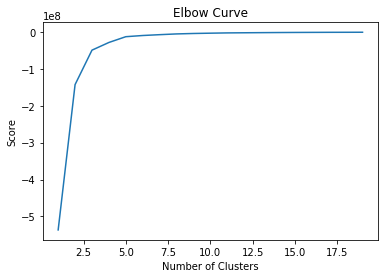

In [11]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(y).score(y) for i in range(len(kmeans))]

pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

pl.show()

In [12]:
pca = PCA(n_components=1).fit(y)

pca_d = pca.transform(y)
pca_c = pca.transform(x)

kmeans=KMeans(n_clusters=3)
kmeansoutput=kmeans.fit(y)
kmeansoutput

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
df['kmeans'] = kmeans.labels_
print(df)
df.to_excel('result_lab_3.xlsx')

         latitude   longitude  kmeans
0       18.456792  -69.951164       0
5       37.005105  -89.176269       0
6      -34.891151  -56.187214       0
7       37.791927 -122.225906       0
8       43.076592  -89.412488       0
9       43.072950  -89.386694       0
10      43.468500  -89.744299       0
11      39.758968 -104.876305       0
12      41.890961   12.490069       2
13      42.331685  -83.047924       0
14      18.386932  -66.061127       0
15      52.501530   13.401851       2
16      40.697132  -73.931351       0
17      18.379998  -65.830948       0
18      47.610786 -122.331306       0
19      40.116748  -88.239270       0
20     -34.891151  -56.187214       0
21      47.610786 -122.331306       0
22      47.610786 -122.331306       0
23      40.717892  -74.067467       0
24      14.622869  -90.529068       0
25      14.674280  121.057495       1
26      10.482834  -66.962128       0
27      42.470310  -96.413949       0
28      33.606510  -88.650419       0
29      40.6

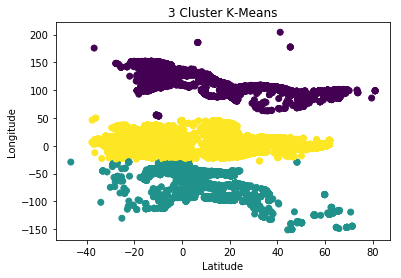

In [14]:
pl.figure('3 Cluster K-Means')
pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)
pl.xlabel('Latitude')
pl.ylabel('Longitude')
pl.title('3 Cluster K-Means')
pl.show()